# kNN - k近邻算法 <br>
## k-Nearest Neighbors

优点：思想极度简单，应用数学知识少，效果好，可以解释机器学习算法使用过程中的很多细节问题，更完整的刻画机器学习应用的流程。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 样本特征集合
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
# 每一个样本所属类别：0 良性肿瘤；1  恶性肿瘤
raw_data_Y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [32]:
X_train = np.array(raw_data_X)
Y_train = np.array(raw_data_Y)

In [33]:
X_train

array([[3.39353321, 2.33127338],
       [3.11007348, 1.78153964],
       [1.34380883, 3.36836095],
       [3.58229404, 4.67917911],
       [2.28036244, 2.86699026],
       [7.42343694, 4.69652288],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.51110105],
       [7.79278348, 3.42408894],
       [7.93982082, 0.79163723]])

In [4]:
Y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

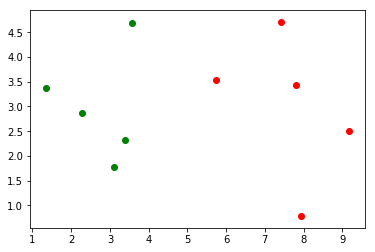

In [5]:
plt.scatter(X_train[Y_train==0,0], X_train[Y_train==0,1], color='g')
plt.scatter(X_train[Y_train==1,0], X_train[Y_train==1,1], color='r')

In [40]:
x = np.array([8.093607318, 3.365731514])

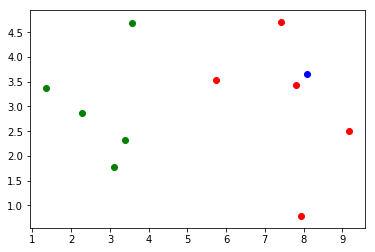

In [7]:
plt.scatter(X_train[Y_train==0,0], X_train[Y_train==0,1], color='g')
plt.scatter(X_train[Y_train==1,0], X_train[Y_train==1,1], color='r')
plt.scatter(x[0], x[1], color='b')

### kNN的过程

欧拉距离 <br>
√((xa - xb)² + (ya - yb)²) <br>
√((xa - xb)² + (ya - yb)² + (za - zb)²) <br>
√((X1a - X1b)² + (X2a - X2b)² + ... + (Xna - Xnb)²)

In [41]:
from math import sqrt
distances = []
for x_train in X_train:
    d = sqrt(np.sum((x_train - x)**2))
    distances.append(d)

In [42]:
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [44]:
nearest = np.argsort(distances)

In [45]:
k = 6

In [46]:
topK_Y = [Y_train[i] for i in nearest[:k]]

In [47]:
topK_Y

[1, 1, 1, 1, 1, 0]

In [49]:
from collections import Counter
Counter(topK_Y)

Counter({1: 5, 0: 1})

In [50]:
votes = Counter(topK_Y)

In [54]:
votes.most_common(1)

[(1, 5)]

In [56]:
predict_Y = votes.most_common(1)[0][0]

In [57]:
predict_Y

1